# **Task 1:**  
# **EXploratory Sales Analytics**

**We are going to perform EDA on sales data to understand trends, seasonality, and missing values.**  

In [2]:
import pandas as pd

**Loading the data and looking at 10 rows each from top and bottom**

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\train.csv')
print(df.head(10))
print(df.tail(10))

   id        date  store_nbr        family  sales  onpromotion
0   0  2013-01-01          1    AUTOMOTIVE    0.0            0
1   1  2013-01-01          1     BABY CARE    0.0            0
2   2  2013-01-01          1        BEAUTY    0.0            0
3   3  2013-01-01          1     BEVERAGES    0.0            0
4   4  2013-01-01          1         BOOKS    0.0            0
5   5  2013-01-01          1  BREAD/BAKERY    0.0            0
6   6  2013-01-01          1   CELEBRATION    0.0            0
7   7  2013-01-01          1      CLEANING    0.0            0
8   8  2013-01-01          1         DAIRY    0.0            0
9   9  2013-01-01          1          DELI    0.0            0
              id        date  store_nbr                      family     sales  \
3000878  3000878  2017-08-15          9                   MAGAZINES    11.000   
3000879  3000879  2017-08-15          9                       MEATS   449.228   
3000880  3000880  2017-08-15          9               PERSONAL C

**since we used the data from the kaggle and it is already cleaned so now we will only try to understand trends and seasonality.**


In [4]:
print(df.dtypes)

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object


In [5]:
print(df.count(axis = 0))


id             3000888
date           3000888
store_nbr      3000888
family         3000888
sales          3000888
onpromotion    3000888
dtype: int64


**there are 3000888 rows or records and 6 columns or features**

In [6]:
df['date_col'] = pd.to_datetime(df['date'])

In [7]:
print(df["date_col"].dtypes)

datetime64[ns]


In [8]:
print(df["date_col"])

0         2013-01-01
1         2013-01-01
2         2013-01-01
3         2013-01-01
4         2013-01-01
             ...    
3000883   2017-08-15
3000884   2017-08-15
3000885   2017-08-15
3000886   2017-08-15
3000887   2017-08-15
Name: date_col, Length: 3000888, dtype: datetime64[ns]


**checking for missing values and duplicate rows**

In [9]:
# returns true or false according to the condition
print(df.isna())
print(df.duplicated())

# returning the total number now 
print("\n number of na in the columns ")
print(df.isna().sum())
print("\n duplicate rows :")
print(df.duplicated().sum())

            id   date  store_nbr  family  sales  onpromotion  date_col
0        False  False      False   False  False        False     False
1        False  False      False   False  False        False     False
2        False  False      False   False  False        False     False
3        False  False      False   False  False        False     False
4        False  False      False   False  False        False     False
...        ...    ...        ...     ...    ...          ...       ...
3000883  False  False      False   False  False        False     False
3000884  False  False      False   False  False        False     False
3000885  False  False      False   False  False        False     False
3000886  False  False      False   False  False        False     False
3000887  False  False      False   False  False        False     False

[3000888 rows x 7 columns]
0          False
1          False
2          False
3          False
4          False
           ...  
3000883    False
3

**since no duplicates drop is not required and since no missing the data is clean to go with**

In [10]:
# calculating the descriptive statistics  
print(df.describe().round(2))

               id   store_nbr       sales  onpromotion
count  3000888.00  3000888.00  3000888.00   3000888.00
mean   1500443.50       27.50      357.78         2.60
std     866281.89       15.59     1102.00        12.22
min          0.00        1.00        0.00         0.00
25%     750221.75       14.00        0.00         0.00
50%    1500443.50       27.50       11.00         0.00
75%    2250665.25       41.00      195.85         0.00
max    3000887.00       54.00   124717.00       741.00


**Although the descriptive statistics may not be sound or useful for every column we calculate all for practice but will use only useful ones that makes sense**

# **Details obtained from the descriptive statistics :**  
**1. id :**  
* there are 3000888 ids meaning transactions.

**2. store_nbr :**  
* there are total 54 stores.  

**3. sales :**  
* total 3000888 transaction occurred.  
* minimum sale amount is 0 means no sale.  
* highest sale amount is 124717.  
* total average sales is 357.78.
* median is just around 11 << mean this means there is so much outliers affecting the central tendency.  
  
**4. onpromotion :**  
* on average there is 2.6 promotions.  
* the spresd of the promotion numbers is 12.22 from the mean.
* the maximum number of promotion that happened for the particular categories is 741.  

In [11]:
print(df['sales'].mode())

0    0.0
Name: sales, dtype: float64


**mode for sales is o it means the most frequent sale amount is 0 meaning no transactions.**

it may be because of store closed, no demand or data issue.

seeing all the quariles the sales arenot tightly clustered they are wide spread 


# **"~Statistics describe - they donot explain~"**

In [12]:
import matplotlib.pyplot as plt

In [13]:
import numpy as np 
import seaborn as sns

In [14]:
df = pd.DataFrame(df)

In [15]:
df['year']=df['date_col'].dt.year
df['month']=df['date_col'].dt.month


In [19]:
print(df.head())

   id        date  store_nbr      family  sales  onpromotion   date_col  year  \
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0 2013-01-01  2013   
1   1  2013-01-01          1   BABY CARE    0.0            0 2013-01-01  2013   
2   2  2013-01-01          1      BEAUTY    0.0            0 2013-01-01  2013   
3   3  2013-01-01          1   BEVERAGES    0.0            0 2013-01-01  2013   
4   4  2013-01-01          1       BOOKS    0.0            0 2013-01-01  2013   

   month  
0      1  
1      1  
2      1  
3      1  
4      1  


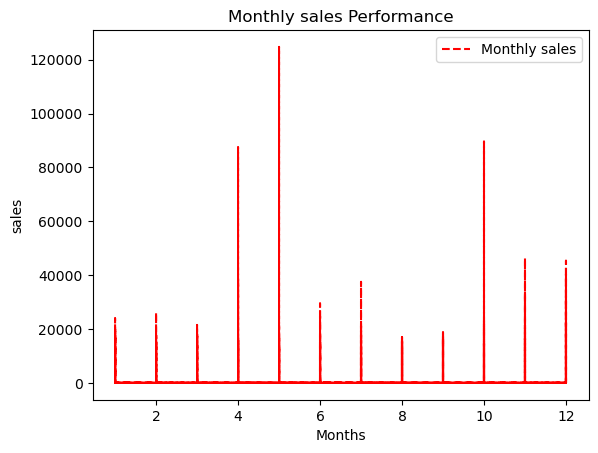

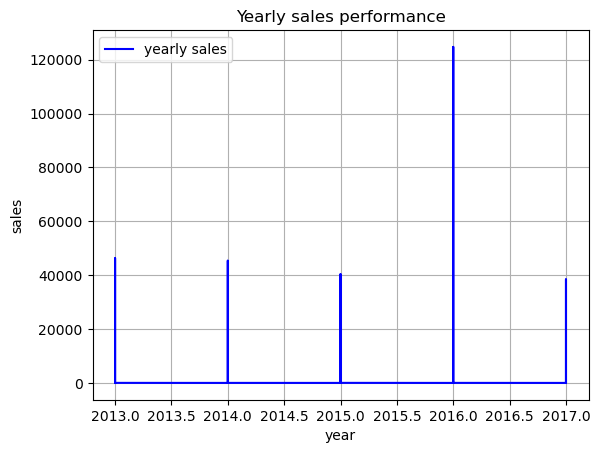

In [17]:
plt.plot(df['month'], df['sales'], linestyle="--", color='r', label='Monthly sales')
plt.title("Monthly sales Performance")
plt.xlabel('Months')
plt.ylabel('sales')
plt.legend()
plt.show()


plt.plot(df['year'], df['sales'], color='b', label='yearly sales')
plt.title('Yearly sales performance')
plt.xlabel('year')
plt.ylabel('sales')


plt.legend()
plt.grid(True)
plt.show()

above charts aren't much clear and instead of continuous horizintal line it draws vertical like lines maybe because it assumed the month, year as descrete.

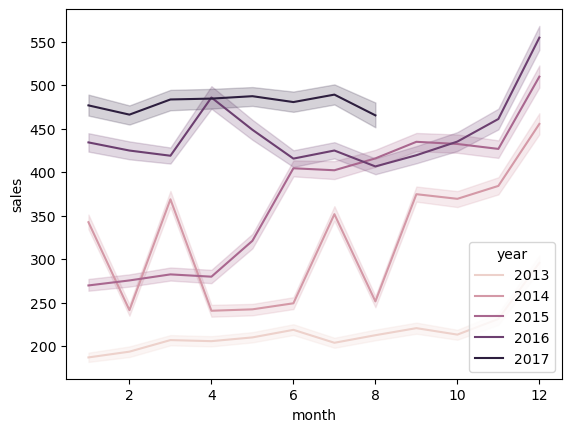

In [18]:
# sort by year and month
df = df.sort_values(['year', 'month'])

# plotting using hue to separate years
sns.lineplot(data=df, x='month', y='sales', hue='year')
plt.show()

Now we have plot the monthly sales trend for particular year in the chart as we can say the starting monthly sales are increasing with the recent years and most of them showing the inclined trend meaning the sales are always increasing at the end of the year and getting some spikes in the middle meaning more sales may be because of certain events that encorage the buyers for the shopping. there is declination also which can be because of shops closed or many factor affecting the customer to not buy the product.

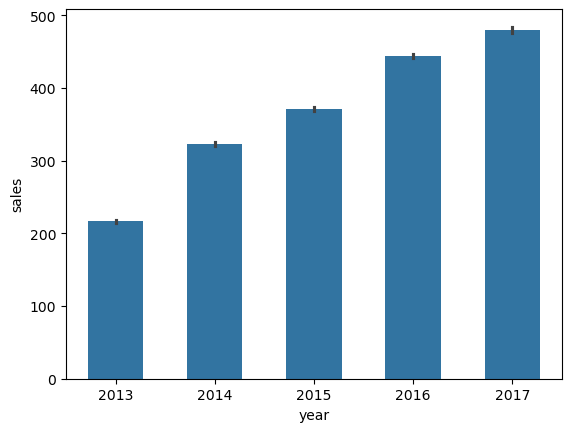

In [21]:
sns.barplot(data=df, x='year', y='sales', estimator='mean', width=0.8, fill=True, gap=0.3)
plt.show()

here we generated the average amount of sales ocurring throughout the year and we can clearly see that with the increasing years the average of sales has also been inv=creasing which tells that the sales is probably gonna increase within following years if it follows the trend as of now.

<Axes: xlabel='month', ylabel='sales'>

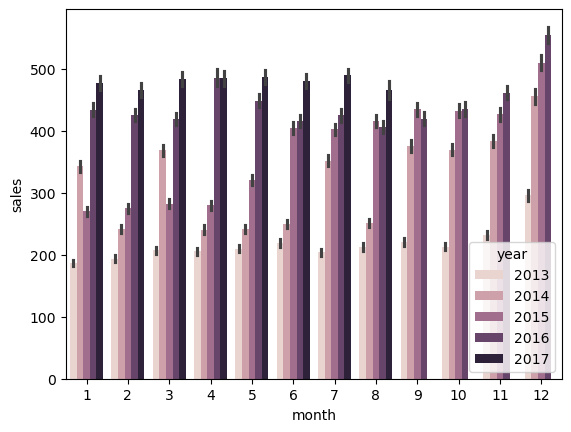

In [ ]:
sns.barplot(data=df, x='month', y='sales', hue='year')


**so above we created the monthly sales bar chart and for each month we have created the sales for all years**

* we can see that the sales are relatively higher in last month may be because of new year eves and resolution, gifts, christmas etc.  
* we can conclude that the sales for about gradual 8 months are similar but after that sales are decreased till 9-11 months and a sudden icrease than all months in the 12 month.

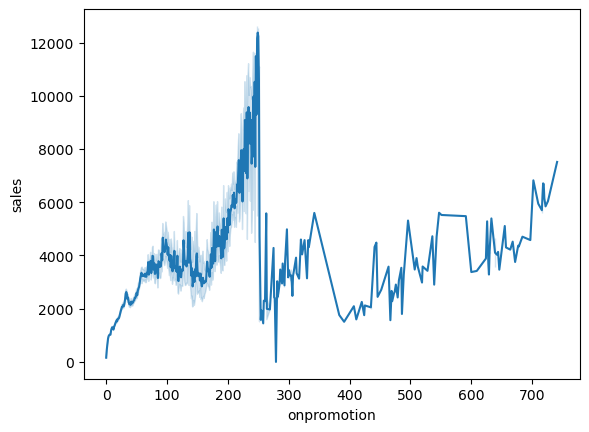

In [28]:
sns.lineplot(data=df, x='onpromotion', y='sales')
plt.show()

we can clearly see that the promotion has a signoficant impact i the sales but it doesn't mean more sales means more promotion we can clearly see that promotion on range 200-300 has the highest amount of sales it means about 200 to 300 promotions for a particular category is enough for the sales.

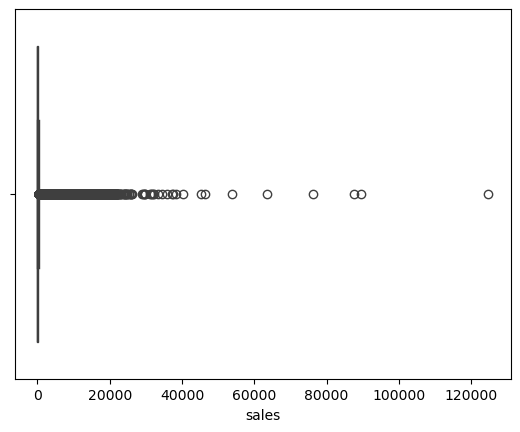

In [32]:
sns.boxplot(data=df, x='sales')
plt.show()

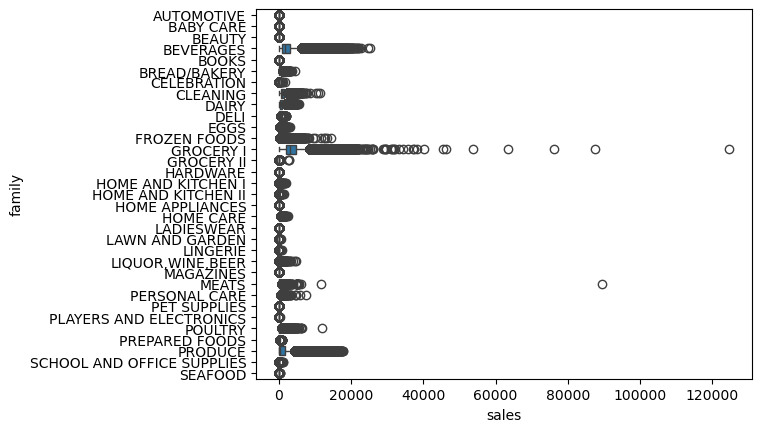

In [35]:
sns.boxplot(x=df['sales'], y=df['family'])
plt.show()

**box plot with respect to the family or category showing otliers for sales and median and quartiles.**